In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
traffic_df = pd.read_csv("Traffic.csv")

In [3]:
traffic_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [4]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [5]:
traffic_df.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [6]:
traffic_df["Time"].unique()

array(['12:00:00 AM', '12:15:00 AM', '12:30:00 AM', '12:45:00 AM',
       '1:00:00 AM', '1:15:00 AM', '1:30:00 AM', '1:45:00 AM',
       '2:00:00 AM', '2:15:00 AM', '2:30:00 AM', '2:45:00 AM',
       '3:00:00 AM', '3:15:00 AM', '3:30:00 AM', '3:45:00 AM',
       '4:00:00 AM', '4:15:00 AM', '4:30:00 AM', '4:45:00 AM',
       '5:00:00 AM', '5:15:00 AM', '5:30:00 AM', '5:45:00 AM',
       '6:00:00 AM', '6:15:00 AM', '6:30:00 AM', '6:45:00 AM',
       '7:00:00 AM', '7:15:00 AM', '7:30:00 AM', '7:45:00 AM',
       '8:00:00 AM', '8:15:00 AM', '8:30:00 AM', '8:45:00 AM',
       '9:00:00 AM', '9:15:00 AM', '9:30:00 AM', '9:45:00 AM',
       '10:00:00 AM', '10:15:00 AM', '10:30:00 AM', '10:45:00 AM',
       '11:00:00 AM', '11:15:00 AM', '11:30:00 AM', '11:45:00 AM',
       '12:00:00 PM', '12:15:00 PM', '12:30:00 PM', '12:45:00 PM',
       '1:00:00 PM', '1:15:00 PM', '1:30:00 PM', '1:45:00 PM',
       '2:00:00 PM', '2:15:00 PM', '2:30:00 PM', '2:45:00 PM',
       '3:00:00 PM', '3:15:00 PM', '3:3

In [7]:
traffic_df["Date"].unique()

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,  9],
      dtype=int64)

In [8]:
traffic_df["Day of the week"].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [9]:
traffic_df["BikeCount"].unique()

array([ 0,  6,  4, 22, 16, 28, 11, 24, 27, 20, 29, 12, 13, 39, 23, 37, 18,
       36, 10,  7,  8,  9, 15, 19, 26, 17, 31, 25, 30, 34,  5, 14, 21,  1,
        2,  3, 32, 38, 35, 47, 52, 59, 43, 56, 68, 70, 46, 44, 67, 57, 42,
       63, 62, 49, 65, 50, 64, 40, 33, 48, 45, 66, 55, 69, 41, 60, 54, 53,
       61, 51, 58], dtype=int64)

In [10]:
traffic_df["Traffic Situation"].unique()

array(['low', 'normal', 'heavy', 'high'], dtype=object)

In [11]:
traffic_df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

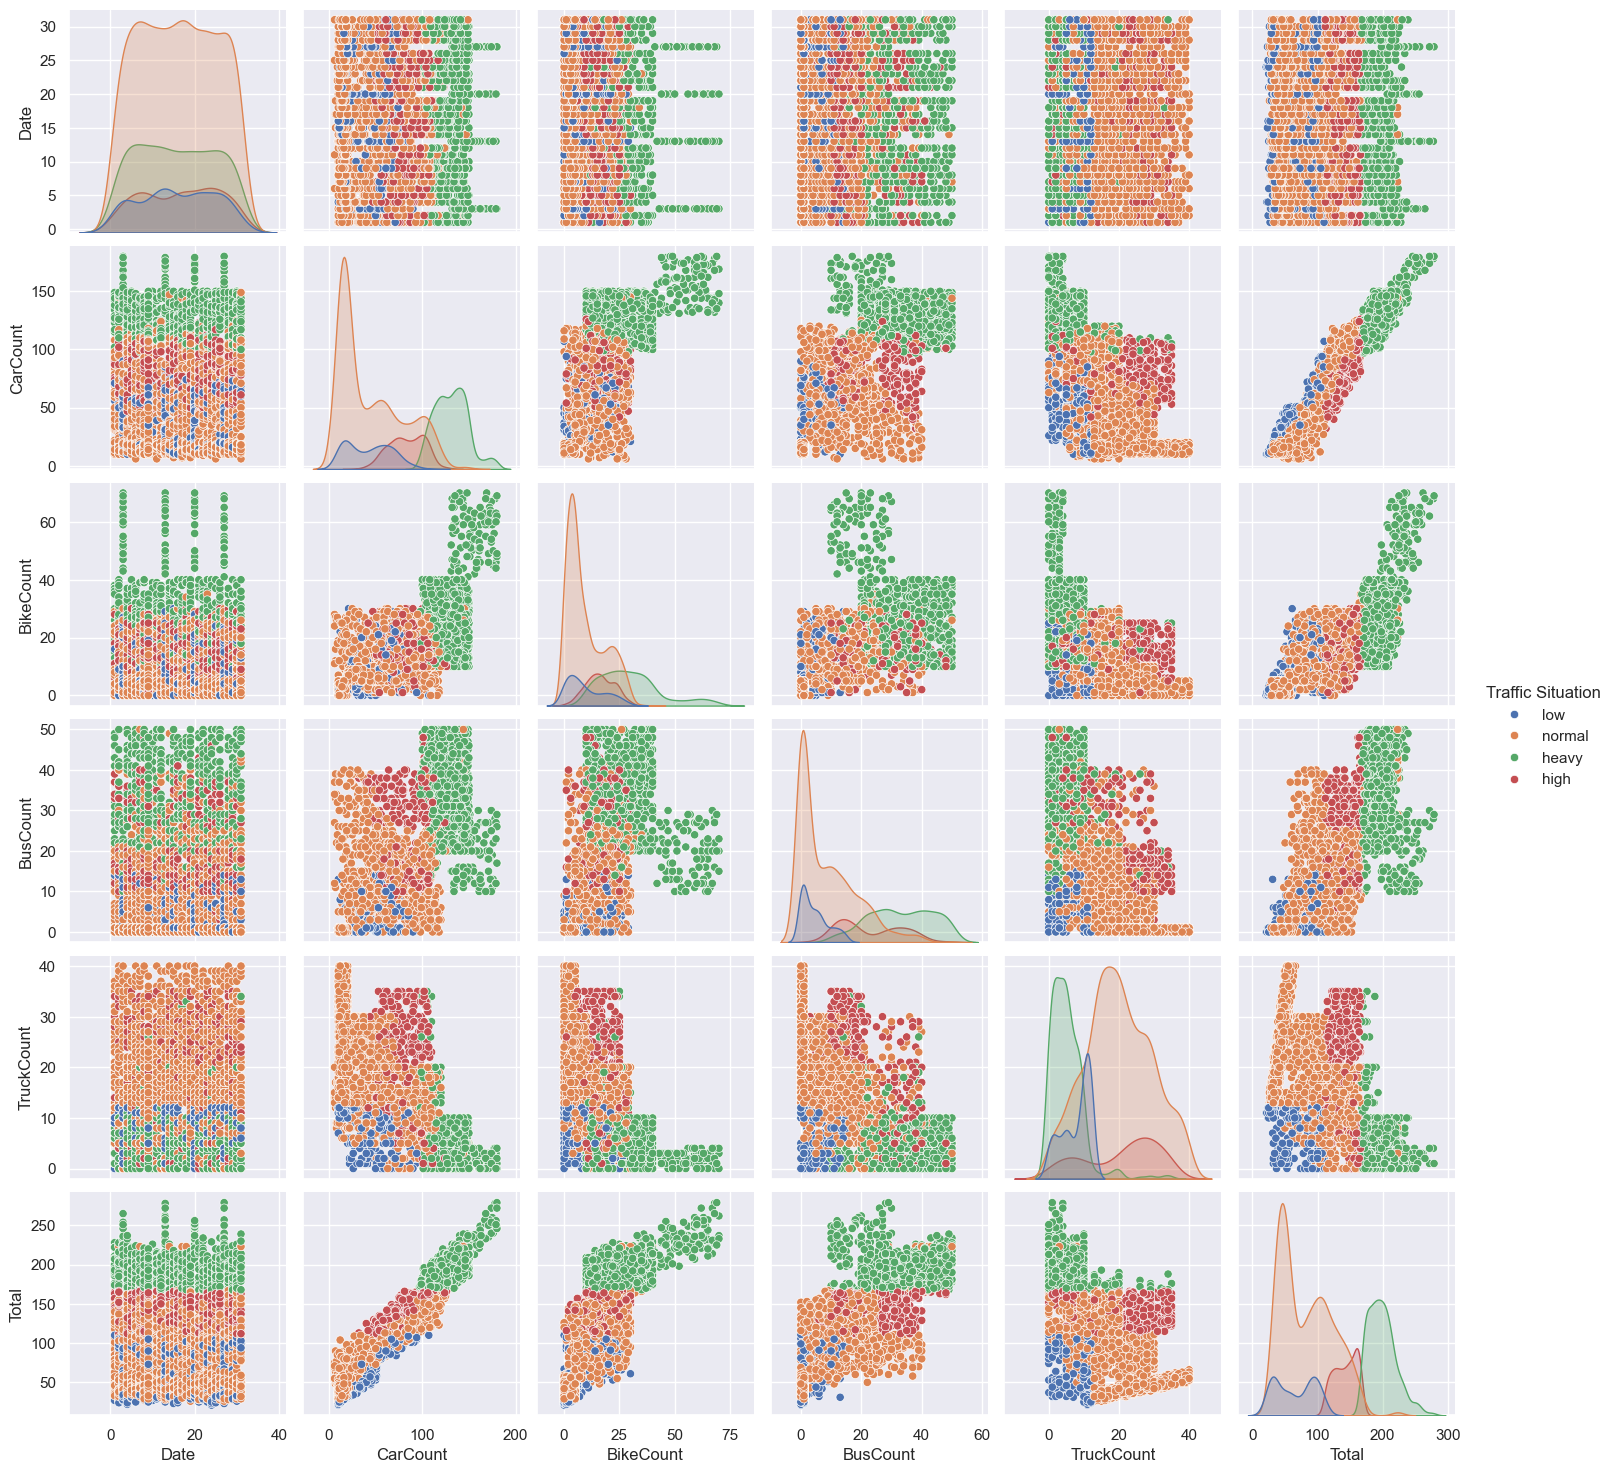

In [12]:
#Exploring the relationship between the numerical columns
numerical_columns = traffic_df.select_dtypes(exclude = "object")
sns.pairplot(traffic_df, hue = "Traffic Situation")

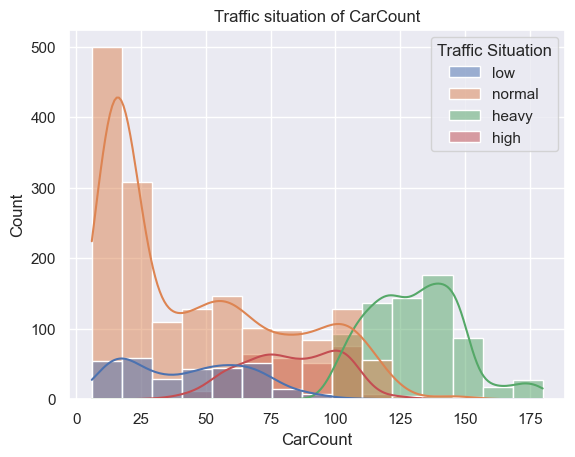

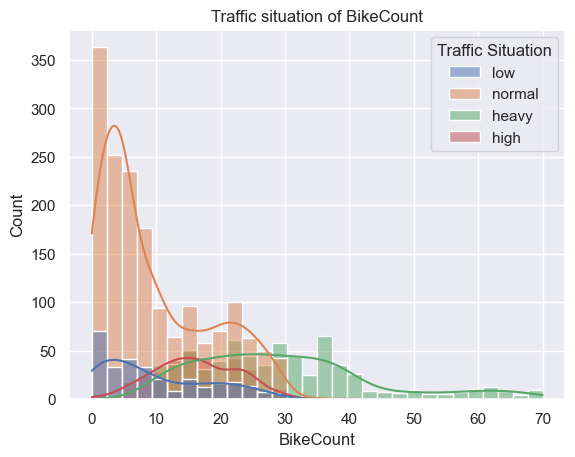

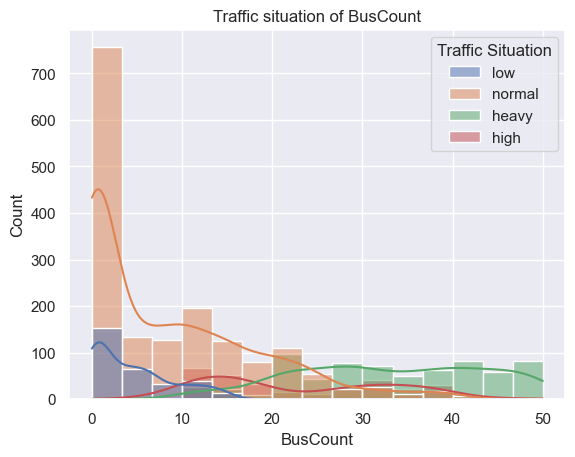

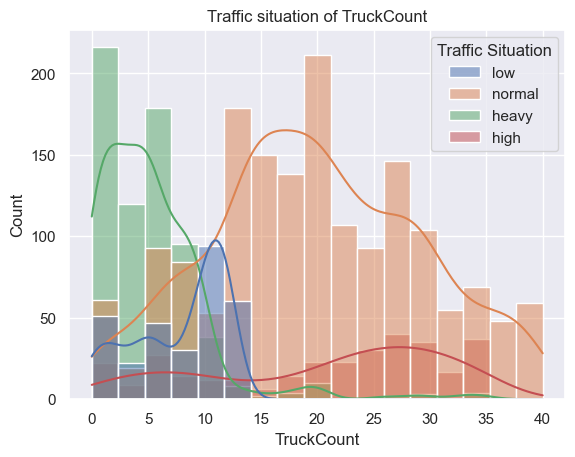

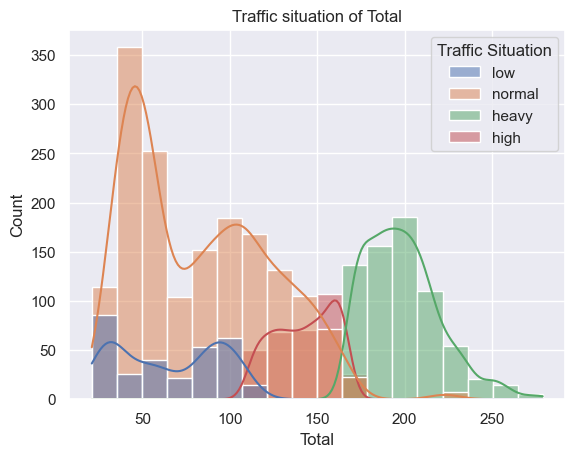

In [13]:
counts = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']

for i in counts:
    sns.histplot(traffic_df, x = i, hue = "Traffic Situation", kde = True)
    plt.title(f"Traffic situation of {i}")
    plt.show()

In [14]:
hour = traffic_df.loc[(traffic_df["Time"].str[3:5] == '00') | (traffic_df["Time"].str[2:4] == '00')]
hour["Time"].unique()

array(['12:00:00 AM', '1:00:00 AM', '2:00:00 AM', '3:00:00 AM',
       '4:00:00 AM', '5:00:00 AM', '6:00:00 AM', '7:00:00 AM',
       '8:00:00 AM', '9:00:00 AM', '10:00:00 AM', '11:00:00 AM',
       '12:00:00 PM', '1:00:00 PM', '2:00:00 PM', '3:00:00 PM',
       '4:00:00 PM', '5:00:00 PM', '6:00:00 PM', '7:00:00 PM',
       '8:00:00 PM', '9:00:00 PM', '10:00:00 PM', '11:00:00 PM'],
      dtype=object)

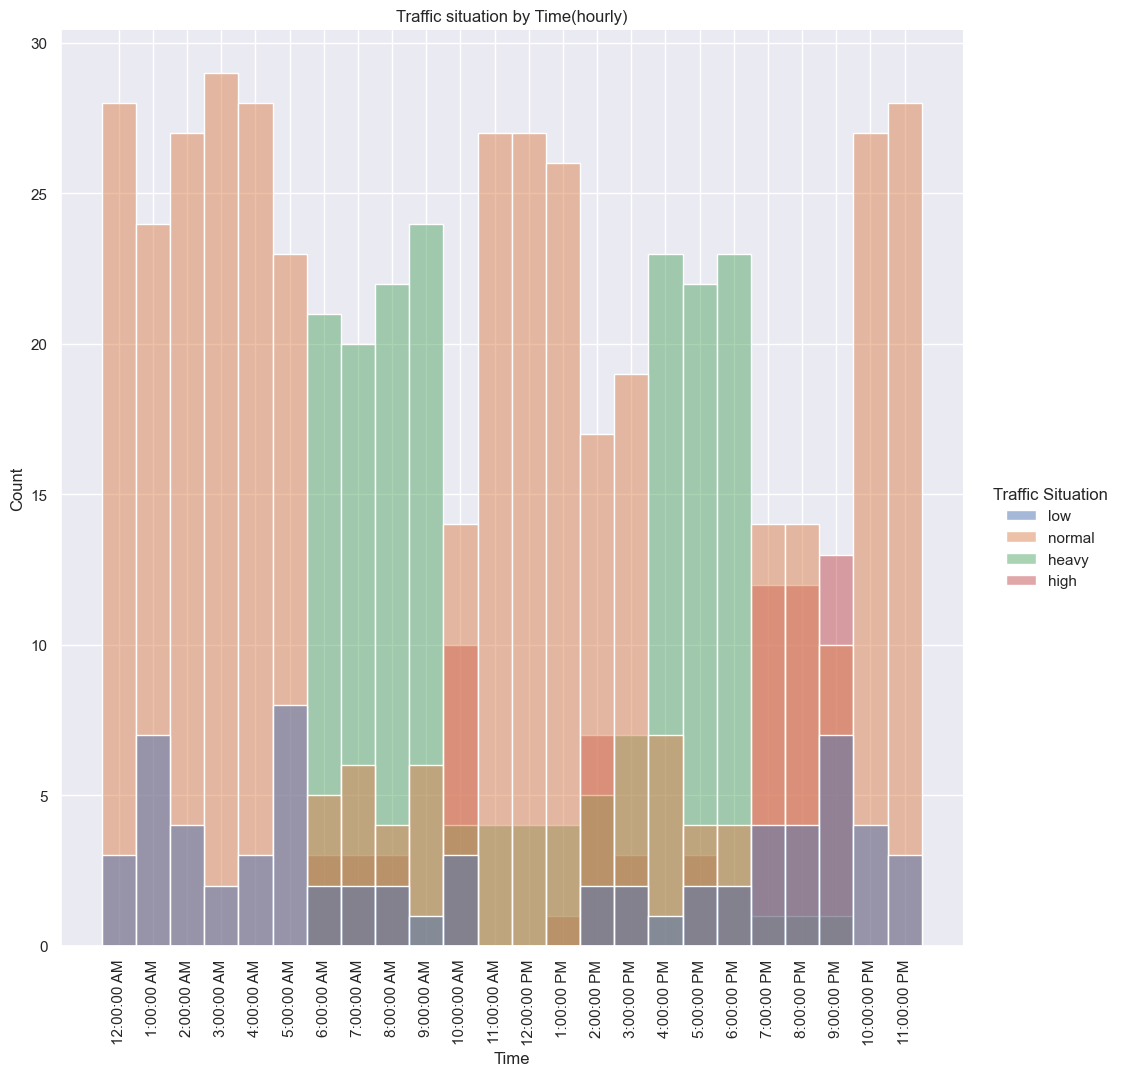

In [15]:
sns.displot(hour, x = hour["Time"], hue = "Traffic Situation", height = 10)
plt.title("Traffic situation by Time(hourly)")
plt.xticks(rotation = 90)
plt.show()



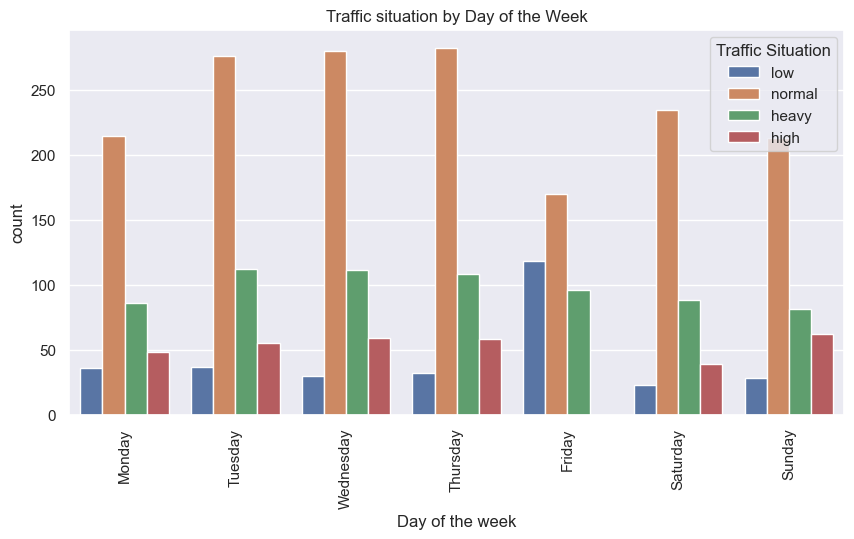

In [16]:
plt.figure(figsize = (10,5))
sns.countplot(traffic_df, x = traffic_df["Day of the week"], hue = "Traffic Situation", order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Traffic situation by Day of the Week")
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='Traffic Situation', ylabel='Count'>

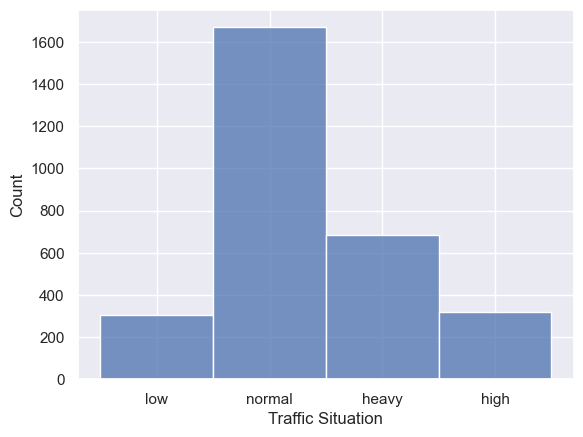

In [17]:
sns.histplot(traffic_df, x = "Traffic Situation")

In [18]:
traffic_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [19]:
# changing the time to seconds
def time_converter(time_str):
    time_format = datetime.strptime(time_str, "%I:%M:%S %p")
    hrs, mins, secs = time_format.hour, time_format.minute, time_format.second
    time_sec = (hrs * 3600) + (mins * 60) + secs
    return time_sec

In [20]:
traffic_df["Time"] = traffic_df["Time"].apply(lambda x: time_converter(x))

In [21]:
traffic_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0,10,Tuesday,31,0,4,4,39,low
1,900,10,Tuesday,49,0,3,3,55,low
2,1800,10,Tuesday,46,0,3,6,55,low
3,2700,10,Tuesday,51,0,2,5,58,low
4,3600,10,Tuesday,57,6,15,16,94,normal


In [22]:
corr = traffic_df.corr()
corr

,Time,Date,CarCount,BikeCount,BusCount,TruckCount,Total
Time,1.000000e+00,1.210516e-15,0.147830,0.140112,0.164964,-0.016984,0.178832
Date,1.210516e-15,1.000000e+00,-0.013453,-0.005089,-0.015536,0.024734,-0.010679
CarCount,1.478302e-01,-1.345292e-02,1.000000,0.722539,0.692994,-0.628157,0.970443
BikeCount,1.401124e-01,-5.088914e-03,0.722539,1.000000,0.566364,-0.575399,0.797429
BusCount,1.649638e-01,-1.553604e-02,0.692994,0.566364,1.000000,-0.546931,0.790705
TruckCount,-1.698369e-02,2.473362e-02,-0.628157,-0.575399,-0.546931,1.000000,-0.555471
Total,1.788323e-01,-1.067861e-02,0.970443,0.797429,0.790705,-0.555471,1.000000


<Axes: >

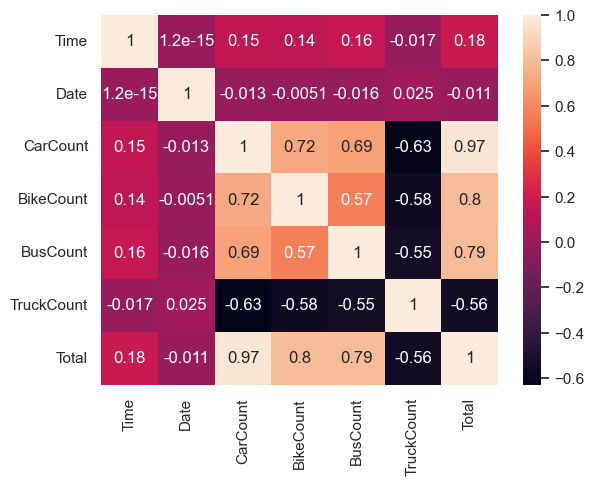

In [23]:
sns.heatmap(corr, annot = True)

Total seems to be highly correlated with counts of different mode, to avoid multicollinearity in the dataset, I will be dropping it.

In [24]:
traffic_df.describe()

,Time,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,42750.000000,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,24944.369702,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,21375.000000,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,42750.000000,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,64125.000000,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,85500.000000,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [25]:
traffic_df["Time"] = traffic_df["Time"].apply(lambda x: (x- min(traffic_df["Time"]))/ (max(traffic_df["Time"]) - min(traffic_df["Time"])))
traffic_df["Date"] = traffic_df["Date"].apply(lambda x: (x- min(traffic_df["Date"]))/ (max(traffic_df["Date"]) - min(traffic_df["Date"])))
traffic_df["CarCount"] = traffic_df["CarCount"].apply(lambda x: (x- min(traffic_df["CarCount"]))/ (max(traffic_df["CarCount"]) - min(traffic_df["CarCount"])))
traffic_df["BikeCount"] = traffic_df["BikeCount"].apply(lambda x: (x- min(traffic_df["BikeCount"]))/ (max(traffic_df["BikeCount"]) - min(traffic_df["BikeCount"])))
traffic_df["BusCount"] = traffic_df["BusCount"].apply(lambda x: (x- min(traffic_df["BusCount"]))/ (max(traffic_df["BusCount"]) - min(traffic_df["BusCount"])))
traffic_df["TruckCount"] = traffic_df["TruckCount"].apply(lambda x: (x- min(traffic_df["TruckCount"]))/ (max(traffic_df["TruckCount"]) - min(traffic_df["TruckCount"])))
traffic_df["Total"] = traffic_df["Total"].apply(lambda x: (x- min(traffic_df["Total"]))/ (max(traffic_df["Total"]) - min(traffic_df["Total"])))


In [26]:
traffic_df.head()


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0.000000,0.3,Tuesday,0.143678,0.000000,0.08,0.100,0.069767,low
1,0.010526,0.3,Tuesday,0.247126,0.000000,0.06,0.075,0.131783,low
2,0.021053,0.3,Tuesday,0.229885,0.000000,0.06,0.150,0.131783,low
3,0.031579,0.3,Tuesday,0.258621,0.000000,0.04,0.125,0.143411,low
4,0.042105,0.3,Tuesday,0.293103,0.085714,0.30,0.400,0.282946,normal


In [27]:
traffic_df["Day of the week"].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [28]:
# Encoding the categorical Variable
traffic_df["Traffic Situation"] = traffic_df["Traffic Situation"].map({'low':0, 'normal':1, 'heavy':2, 'high':3})
traffic_df["Day of the week"] = traffic_df["Day of the week"].map({"Monday":0, "Tuesday":1, "Wednesday":2, "Thursday":3, "Friday":4, "Saturday":5, "Sunday":6})


In [29]:
traffic_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0.000000,0.3,1,0.143678,0.000000,0.08,0.100,0.069767,0
1,0.010526,0.3,1,0.247126,0.000000,0.06,0.075,0.131783,0
2,0.021053,0.3,1,0.229885,0.000000,0.06,0.150,0.131783,0
3,0.031579,0.3,1,0.258621,0.000000,0.04,0.125,0.143411,0
4,0.042105,0.3,1,0.293103,0.085714,0.30,0.400,0.282946,1


<Axes: xlabel='Traffic Situation', ylabel='Count'>

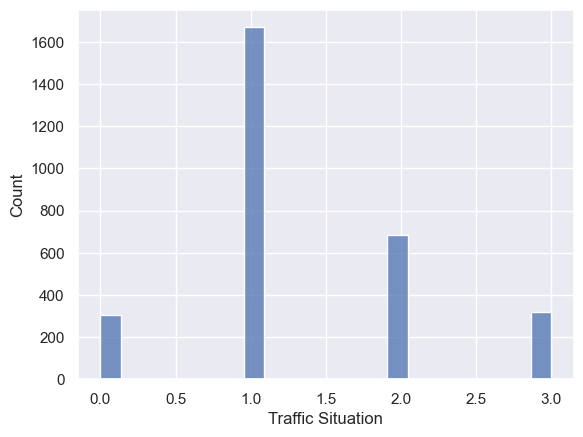

In [30]:
sns.histplot(traffic_df, x = "Traffic Situation")

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
x = KNeighborsClassifier()

In [88]:
def most_label(lst):
    counts = {n:lst.count(n) for n in lst}
    return(max(counts, key = counts.get))

In [33]:
class KNearestNeighbour_algorithm:
    def __init__(self, n_neighbour: int = 5, distance_metric: str = "Euclidean"):
        self.n_neighbour = n_neighbour
        self.distance_metric = distance_metric
    
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def metrics(self, x, y):
        if self.distance_metric == "Euclidean":
            metric = np.sqrt(np.sum((x - y)**2))
        if self.distance_metric == "Manhattan":
            metric = np.sum(np.abs(x - y))
        return metric
    
    def get_neighbour(self, new_point):
        distances = []
        labels = []
        
        for i in range(len(self.x_train)):
            distances.append(self.metrics(new_point, self.x_train[i]))
            labels.append(self.y_train[i])

        # Sort lists based on distances
        sorted_data = sorted(zip(distances, labels), key = lambda x : x[0])

        # Unpack sorted data into separate lists
        sorted_distances, sorted_labels = zip(*sorted_data)
        neighbour_distances = list(sorted_distances)[:self.n_neighbour]
        neighbour_labels = list(sorted_labels)[:self.n_neighbour]
        return neighbour_distances, neighbour_labels

    def predict(self, x_test):
        prediction = []
        for i in range(len(self.x_test)):
            neighbour_distances = self.get_neighbour(self.x_test[i])[0]
            neighbour_labels = self.get_neighbour(self.x_test[i])[1]
            prediction.append(most_label(neighbour_labels))
        return prediction
    
    def evaluate()


    

            



SyntaxError: incomplete input (2880707661.py, line 32)

In [ ]:
class KNearestNeighbour_algorithm:
    def __init__(self, n_neighbour: int = 5, distance_metric: str = "Euclidean"):
        self.n_neighbour = n_neighbour
        self.distance_metric = distance_metric
    
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def metrics(self, x, y):
        if self.distance_metric == "Euclidean":
            metric = np.sqrt(np.sum((x - y)**2))
        if self.distance_metric == "Manhattan":
            metric = np.sum(np.abs(x - y))
        return metric
    
    def get_neighbour(self, new_point):
        distances_label_dict = {}
        
        for i in range(len(self.x_train)):
            distance = self.metrics(new_point, self.x_train[i])
            distances_label_dict[distance] = self.y_train[i]

        distances_label_dict = sorted(distances_label_dict)
        sorted_distances_label_dict = {key: distances_label_dict[key] for key in distances_label_dict}
        return {key: sorted_distances_label_dict[key] for key in list(sorted_distances_label_dict)[:self.n_neighbour]}

    def predict(self, x_test):
        prediction = []
        for i in range(len(self.x_test)):
            neighbour_distances = self.get_neighbour(self.x_test[i])
            neighbour_label = 


    

            



In [ ]:
    def get_neighbour(self, new_point):
        distances = []
        labels = []
        
        for i in range(len(self.x_train)):
            distances.append(self.metrics(new_point, self.x_train[i]))
            labels.append(self.y_train[i])

        # Sort lists based on distances
        sorted_data = sorted(zip(distances, labels), key = lambda x : x[0])

        # Unpack sorted data into separate lists
        sorted_distances, sorted_labels = zip(*sorted_data)
        neighbour_distances = list(sorted_distances)[:self.n_neighbour]
        neighbour_labels = list(sorted_labels)[:self.n_neighbour]
        return neighbour_distances, neighbour_labels

    def predict(self, x_test):
        prediction = []
        for i in range(len(self.x_test)):
            neighbour_distances = self.get_neighbour(self.x_test[i])[0]
            neighbour_labels = self.get_neighbour(self.x_test[i])[1]

In [74]:
distances = [3.5, 1.2, 2.8, 0.9, 0.1]
labels = [8, 10, 5, 20, 50]

# Sort lists based on distances
sorted_data = sorted(zip(distances, labels), key = lambda x : x[0])

# Unpack sorted data into separate lists
sorted_distances, sorted_labels = zip(*sorted_data)

print("Sorted Distances:", sorted_distances)
print("Sorted Labels:", sorted_labels)


Sorted Distances: (0.1, 0.9, 1.2, 2.8, 3.5)
Sorted Labels: (50, 20, 10, 5, 8)


In [81]:
def most_common(lst):
    '''Returns the most common element in a list'''
    return max(set(lst), key=lst.count)

In [82]:
most_common([1,2,3,4,1])

1

In [86]:
x = [1,2,3,4,1].count
print(x)

<built-in method count of list object at 0x0000025E85482000>


In [53]:
for key, value in my_dict.items():
    print(key, value)

a 1
b 2
c 3
d 4
e 5
f 6
g 7
h 8
i 9
j 10


In [52]:
my_dict = {"a": 1, "b": 2, "c": 3, "d": 4, "e": 5, "f": 6, "g": 7, "h": 8, "i": 9, "j": 10}

# Extract the first 5 key-value pairs
first_5_pairs = {key: my_dict[key] for key in list(my_dict)[:5]}

print(first_5_pairs)


{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}


In [41]:
dic

[1, 2, 3, 5, 7, 10]

In [ ]:
class KNearestNeighbour_algorithm:
    def __init__(self, n_neighbour: int = 5, distance_metric: str = "Euclidean"):
        self.n_neighbour = n_neighbour
        self.distance_metric = distance_metric
    
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def metrics(self, x, y):
        if self.distance_metric == "Euclidean":
            metric = np.sqrt(np.sum((x - y)**2))
        elif self.distance_metric == "Manhattan":
            metric = np.sum(np.abs(x - y))
        else:
            raise ValueError("Invalid distance metric. Supported metrics: 'Euclidean', 'Manhattan'")
        return metric
